<a href="https://www.kaggle.com/code/stevenmpro/spaceship-titanic?scriptVersionId=104557936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Remarques on the original notebook

Optimization : 
    Use ordinal_encoder instead of a looping with label_encoder on columns
    
Cleaning :
    why instantiate a knn and never use it?

____________________________________

This notebook is created to respond to the competition and improve my knowledge of how kaggle works.

In order to use all functions, this notebook is based on Arif Enes Aydın's.

Link : https://www.kaggle.com/code/arifenesaydn/spaceship-titanic

### 1. Importing the librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

### 2. Importing the data:

In [2]:
# Listing directoriers and files

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [3]:
# Loading data

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
x_train = train.drop(columns='Transported')
y_train = train.loc[:, 'Transported']
x_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')


In [4]:
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
x_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### 3. First analyses

In [6]:
print(f'train_set : {train.shape}')
print(f'test_set : {x_test.shape}')

train_set : (8693, 14)
test_set : (4277, 13)


### Target exploration

In [7]:
y_train.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

<BarContainer object of 2 artists>

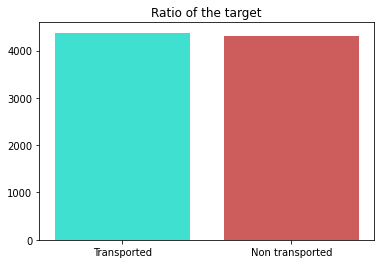

In [8]:
plt.title('Ratio of the target')
plt.bar(x=['Transported', 'Non transported'], height=y_train.value_counts(), color=('turquoise', 'indianred'))

In [9]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:>

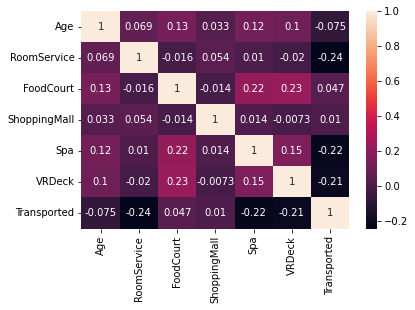

In [10]:
sns.heatmap(train.corr(), annot=True)

### Features exploration

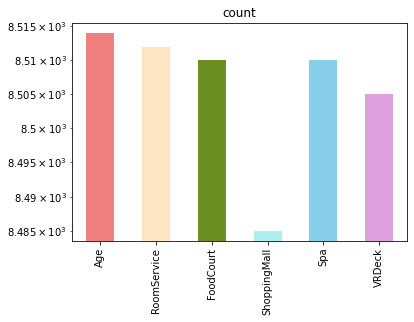

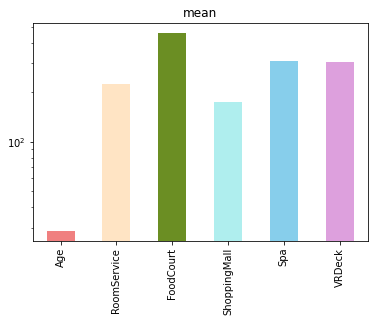

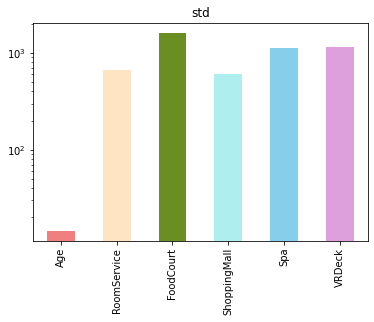

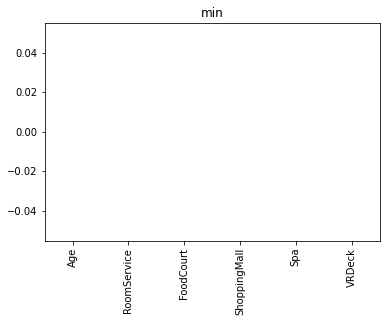

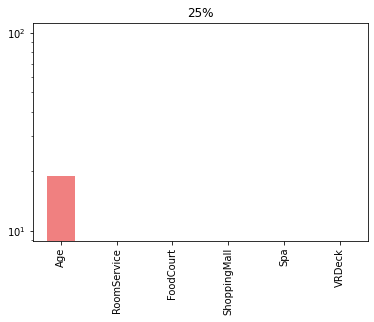

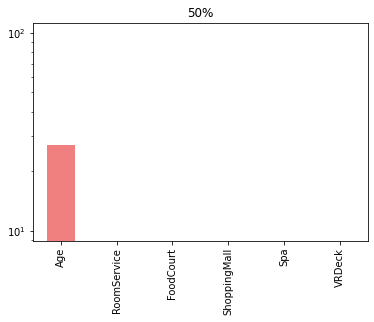

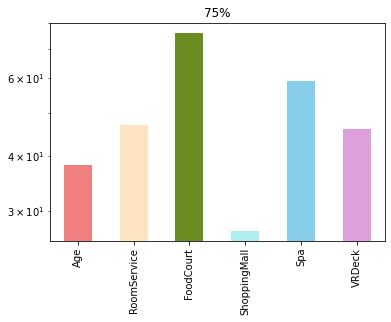

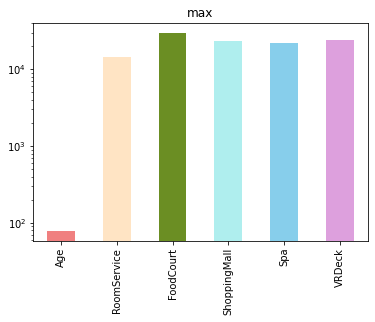

In [11]:
color = ['lightcoral', 'bisque', 'olivedrab', 'paleturquoise', 'skyblue', 'plum']

for col in train.describe().T:
    train.describe().T[col].plot.bar(color=color)
    plt.title(col)
    if col != 'min':
        plt.yscale('log')
        
    plt.show()

In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


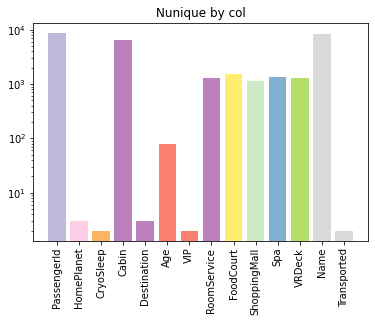

In [14]:
np.random.seed(1234)
cmap = matplotlib.cm.get_cmap('Set3')
color = [cmap(np.random.rand()) for _ in range(train.shape[1])]

plt.bar(train.columns,train.nunique(), color=color)
plt.title('Nunique by col')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

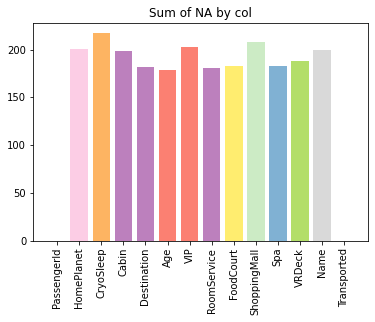

In [15]:
plt.bar(train.columns, train.isnull().sum(), color=color)
plt.title('Sum of NA by col')
plt.xticks(rotation=90)
plt.show()

### 4. Preprocessing

In [16]:
# Add preprocessing pipeline for optimisation

categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorial_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))
numerical_pipeline = make_pipeline(SimpleImputer(strategy = 'mean', fill_value=0), StandardScaler())

preprocessor = make_column_transformer((categorial_pipeline, categorical_features),
                       (numerical_pipeline, numerical_features))

In [17]:
y_train = LabelEncoder().fit_transform(y_train)

### 5. train et validation set

In [18]:
train_set, val_train_set, test_set, val_test_set  = train_test_split(x_train, y_train, test_size=0.25, random_state=0)

### 6. Model training

In [19]:
model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear'))
model.fit(train_set, test_set)
score = model.score(val_train_set, val_test_set)

print(f'Our baseline to beat is {score}')

Our baseline to beat is 0.7851885924563018


#### We will add a polynomialFeatures to the numerical_pipeline and find the best parameters with GridSearchCV.

In [20]:

categorical_features = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

categorial_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder(handle_unknown = 'ignore'))
numerical_pipeline = make_pipeline(SimpleImputer(strategy = 'mean', fill_value=0), PolynomialFeatures(), StandardScaler())

preprocessor = make_column_transformer((categorial_pipeline, categorical_features),
                       (numerical_pipeline, numerical_features))

model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear'))

In [21]:
param_grid = {'columntransformer__pipeline-2__simpleimputer__strategy' : ['mean', 'median', 'most_frequent'],
              'columntransformer__pipeline-2__polynomialfeatures__degree' : [2, 3, 4, 5],
              'logisticregression__penalty' : ['l1', 'l2', 'elasticnet'],
              'logisticregression__solver' : ['newton-cg', 'liblinear'],
              'logisticregression__C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1]
             }

grid = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5)

In [22]:
grid.fit(train_set, test_set)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Cabin',
                                                                          'Destination',
       

In [23]:
grid.best_params_

{'columntransformer__pipeline-2__polynomialfeatures__degree': 3,
 'columntransformer__pipeline-2__simpleimputer__strategy': 'most_frequent',
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

{'columntransformer__pipeline-2__polynomialfeatures__degree': 3,
 'columntransformer__pipeline-2__simpleimputer__strategy': 'most_frequent',
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [24]:
grid.best_estimator_.score(val_train_set, val_test_set)

0.7865685372585096

In [25]:
model = make_pipeline(preprocessor, LogisticRegression(solver='liblinear'))
model.fit(x_train, y_train)
model.score(val_train_set, val_test_set)

0.858325666973321

In [26]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                     

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomePlanet', 'CryoSleep',
                                                   'Cabin', 'Destination',
                                                   'VIP']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=0)),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'RoomService',
                                                   'FoodCourt', 'ShoppingMall',
                                                   'Spa', 'VRDeck'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [27]:
prediction = model.predict(x_test)

In [28]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

### 7. Prediction

In [29]:
data = {'PassengerId': x_test.PassengerId, 'Transported': prediction}
pred_df = pd.DataFrame.from_dict(data)
pred_df['Transported'].replace({0: False, 1:True}, inplace=True)

<AxesSubplot:ylabel='Transported'>

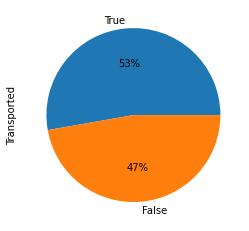

In [30]:
pred_df.Transported.value_counts().plot(kind='pie', autopct='%.0f%%')

### 8. Submission

In [31]:
pred_df.to_csv('submission.csv', index=False)